# Naive Bayes w/o WE


## Preprocessing 

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# cd drive/MyDrive/NLP_Project

In [1]:
# !pip install pandas matplotlib tqdm seaborn sklearn numpy graphviz
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('always') 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pickle as pk

In [5]:
trainData = np.load('../../../dataFinal/npy_files/noWE_t2_train.npy')
trainLabels = open('../../../dataFinal/finalTrainLabels.labels', 'r').readlines()
testData = np.load('../../../dataFinal/npy_files/noWE_t2_test.npy')
testLabels = open('../../../dataFinal/finalTestLabels.labels', 'r').readlines()
validationData = np.load('../../../dataFinal/npy_files/noWE_t2_trial.npy')
validationLabels = open('../../../dataFinal/finalDevLabels.labels', 'r').readlines()

/var/folders/gj/mzxgltyj3wb83jl14fkhz8_w0000gn/T/ipykernel_93305/667481205.py:2: ResourceWarning: unclosed file <_io.TextIOWrapper name='finalTrainLabels.labels' mode='r' encoding='UTF-8'>
  trainLabels = open('finalTrainLabels.labels', 'r').readlines()
/var/folders/gj/mzxgltyj3wb83jl14fkhz8_w0000gn/T/ipykernel_93305/667481205.py:4: ResourceWarning: unclosed file <_io.TextIOWrapper name='finalTestLabels.labels' mode='r' encoding='UTF-8'>
  testLabels = open('finalTestLabels.labels', 'r').readlines()
/var/folders/gj/mzxgltyj3wb83jl14fkhz8_w0000gn/T/ipykernel_93305/667481205.py:6: ResourceWarning: unclosed file <_io.TextIOWrapper name='finalDevLabels.labels' mode='r' encoding='UTF-8'>
  validationLabels = open('finalDevLabels.labels', 'r').readlines()


In [6]:
for i in tqdm(range(len(trainLabels))):
    trainLabels[i] = int(trainLabels[i])
for i in tqdm(range(len(testLabels))):
    testLabels[i] = int(testLabels[i])
for i in tqdm(range(len(validationLabels))):
    validationLabels[i] = int(validationLabels[i])

100%|██████████| 10008/10008 [00:00<00:00, 1345748.73it/s]


In [7]:
trainLabels = np.array(trainLabels)
testLabels = np.array(testLabels)
validationLabels = np.array(validationLabels)
trainLabels = trainLabels.reshape((-1, ))
testLabels = testLabels.reshape((-1, ))
validationLabels = validationLabels.reshape((-1, ))
X_train, X_test, y_train, y_test, X_val, y_val = trainData, testData, trainLabels, testLabels, validationData, validationLabels

## Gaussian - Better

In [8]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = testLabels
print("Test Data:")
accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_true) * 100,2)
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
y_pred = clf.predict(X_train)
y_true = trainLabels
print("Train Data:")
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
y_pred = clf.predict(X_val)
y_true = validationLabels
print("Validation Data:")
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

Test Data:
Accuracy % :  6.62
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.75      0.00      0.00      1955
           3       0.00      0.00      0.00      1099
           4       0.60      0.00      0.01      1246
           5       0.00      0.00      0.00       786
           6       0.38      0.00      0.01       809
           7       0.15      0.00      0.00       928
           8       0.06      0.01      0.02       669
           9       0.06      0.05      0.05       569
          10       0.07      0.06      0.06       595
          11       0.18      0.27      0.22       696
          12       0.07      0.65      0.13       546
          13       0.05      0.08      0.06       492
          14       0.01      0.00      0.00       536
          15       0.05      0.37      0.09       498
          16       0.05      0.04      0.04       492
          17       0.06      0.70      0.11       5

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
itr= [1]
test_accuracy = [6.62]
train_accuracy = [9.63]
trial_accuracy = [6.52]

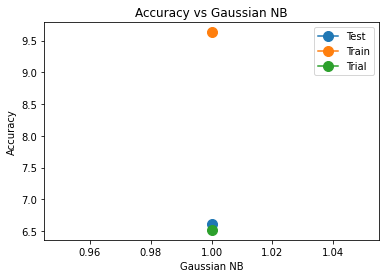

In [ ]:

plt.plot(itr, test_accuracy, label = "Test", marker="o", markersize=10,)
plt.plot(itr, train_accuracy, label = "Train", marker="o", markersize=10,)
plt.plot(itr, trial_accuracy, label = "Trial", marker="o", markersize=10,)
# plt.xlim(1, 1)
# plt.ylim(26, 28)
plt.xlabel('Gaussian NB')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Gaussian NB')
plt.legend()
plt.show()


In [9]:
filename = 'finalModelGNB_NoWE_2K'
pk.dump(clf,open(filename,'wb'))

/var/folders/gj/mzxgltyj3wb83jl14fkhz8_w0000gn/T/ipykernel_93305/2099083165.py:2: ResourceWarning: unclosed file <_io.BufferedWriter name='finalModelGNB_NoWE_2K'>
  pk.dump(clf,open(filename,'wb'))


## Bernoulli

In [10]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = testLabels
print("Test Data:")
accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_true) * 100,2)
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
y_pred = clf.predict(X_train)
y_true = trainLabels
print("Train Data:")
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
y_pred = clf.predict(X_val)
y_true = validationLabels
print("Validation Data:")
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

Test Data:
Accuracy % :  27.27
              precision    recall  f1-score   support

           1       0.23      0.21      0.22      2022
           2       0.29      0.45      0.35      1955
           3       0.17      0.06      0.09      1099
           4       0.31      0.41      0.35      1246
           5       0.12      0.04      0.06       786
           6       0.16      0.08      0.10       809
           7       0.23      0.13      0.17       928
           8       0.16      0.07      0.09       669
           9       0.10      0.07      0.09       569
          10       0.10      0.04      0.06       595
          11       0.36      0.34      0.35       696
          12       0.26      0.42      0.32       546
          13       0.08      0.01      0.02       492
          14       0.10      0.04      0.05       536
          15       0.16      0.07      0.10       498
          16       0.08      0.03      0.04       492
          17       0.66      0.59      0.62       

In [ ]:
itr= [1]
test_accuracy = [27.27]
train_accuracy = [31.48]
trial_accuracy = [26.58]

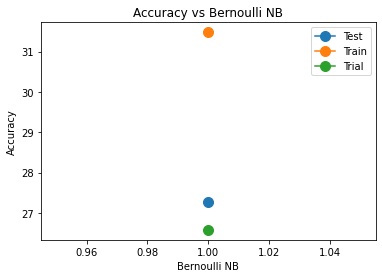

In [ ]:

plt.plot(itr, test_accuracy, label = "Test", marker="o", markersize=10,)
plt.plot(itr, train_accuracy, label = "Train", marker="o", markersize=10,)
plt.plot(itr, trial_accuracy, label = "Trial", marker="o", markersize=10,)
# plt.xlim(1, 1)
# plt.ylim(26, 28)
plt.xlabel('Bernoulli NB')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Bernoulli NB')
plt.legend()
plt.show()


In [11]:
filename = 'finalModelBNBNoWE_2K'
pk.dump(clf,open(filename,'wb'))

/var/folders/gj/mzxgltyj3wb83jl14fkhz8_w0000gn/T/ipykernel_93305/4178642856.py:2: ResourceWarning: unclosed file <_io.BufferedWriter name='finalModelBNBNoWE_2K'>
  pk.dump(clf,open(filename,'wb'))


## Multinomial

In [12]:

import numpy as np
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = testLabels
print("Test Data:")
accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_true) * 100,2)
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
y_pred = clf.predict(X_train)
y_true = trainLabels
print("Train Data:")
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
y_pred = clf.predict(X_val)
y_true = validationLabels
print("Validation Data:")
print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

Test Data:
Accuracy % :  29.0
              precision    recall  f1-score   support

           1       0.24      0.14      0.17      2022
           2       0.30      0.42      0.35      1955
           3       0.30      0.01      0.01      1099
           4       0.39      0.34      0.36      1246
           5       0.00      0.00      0.00       786
           6       0.35      0.04      0.07       809
           7       0.31      0.09      0.13       928
           8       0.62      0.02      0.04       669
           9       0.33      0.01      0.01       569
          10       0.21      0.01      0.01       595
          11       0.51      0.26      0.34       696
          12       0.38      0.26      0.31       546
          13       0.12      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.24      0.01      0.02       498
          16       0.50      0.00      0.00       492
          17       0.68      0.43      0.53       5

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Data:
Accuracy % :  30.76


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           1       0.31      0.17      0.22      7076
           2       0.33      0.45      0.38      6842
           3       0.52      0.02      0.03      3842
           4       0.43      0.37      0.39      4363
           5       0.17      0.00      0.00      2751
           6       0.39      0.04      0.07      2831
           7       0.36      0.10      0.16      3250
           8       0.48      0.02      0.04      2341
           9       0.47      0.00      0.01      1992
          10       0.44      0.01      0.02      2083
          11       0.57      0.30      0.39      2433
          12       0.37      0.25      0.30      1908
          13       0.73      0.01      0.02      1722
          14       0.43      0.00      0.00      1878
          15       0.37      0.02      0.03      1745
          16       0.15      0.00      0.00      1721
          17       0.66      0.45      0.54      1976
          18       0.29    

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
itr= [1]
test_accuracy = [29]
train_accuracy = [30.76]
trial_accuracy = [28.75]

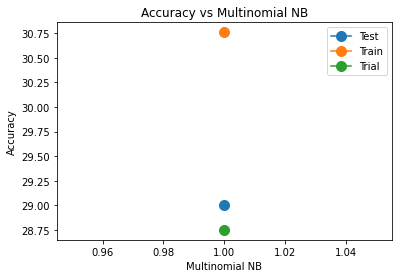

In [ ]:

plt.plot(itr, test_accuracy, label = "Test", marker="o", markersize=10,)
plt.plot(itr, train_accuracy, label = "Train", marker="o", markersize=10,)
plt.plot(itr, trial_accuracy, label = "Trial", marker="o", markersize=10,)
# plt.xlim(1, 1)
# plt.ylim(26, 28)
plt.xlabel('Multinomial NB')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Multinomial NB')
plt.legend()
plt.show()


In [13]:
filename = 'finalModelMNBNoWE_2K'
pk.dump(clf,open(filename,'wb'))

# import numpy as np
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB()
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# y_true = testLabels
# print("Test Data:")
# accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_true) * 100,2)
# print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
# print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
# y_pred = clf.predict(X_train)
# y_true = trainLabels
# print("Train Data:")
# print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
# print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
# y_pred = clf.predict(X_val)
# y_true = validationLabels
# print("Validation Data:")
# print("Accuracy % : ",round(accuracy_score(y_pred = y_pred, y_true=y_true) * 100,2))
# print(classification_report(y_true,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

/var/folders/gj/mzxgltyj3wb83jl14fkhz8_w0000gn/T/ipykernel_93305/2254380760.py:2: ResourceWarning: unclosed file <_io.BufferedWriter name='finalModelMNBNoWE_2K'>
  pk.dump(clf,open(filename,'wb'))
